In [2]:
import pandas as pd
import numpy as np


dataset = pd.read_csv("clinical_events.csv",index_col=0)
dataset.head()

/Users/lno7761/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,clinical_event_id,clinical_event_member_id,clinical_event_name,clinical_event_time,clinical_event_member_age,member_male
1,1.0,1,ANNUAL VISIT,41,81,1
2,2.0,1,STROKE HOSPITALIZATION,641,81,1
3,3.0,1,HYPERTENSION MANAGEMENT VISIT,116,81,1
4,4.0,1,HYPERTENSION MANAGEMENT VISIT,293,81,1
5,5.0,2,ANNUAL VISIT,14,76,1


# Dataset attributes

In [3]:
print("shape of dataset = ", dataset.shape)
print("number of unique clinical_event_id = ", len(dataset.clinical_event_id.unique()))
print("max clinical_event_id = ", dataset.clinical_event_id.max())
print("number of unique members = ", len(dataset.clinical_event_member_id.unique()))
print("max member id = ", dataset.clinical_event_member_id.max())

shape of dataset =  (511846, 6)
number of unique clinical_event_id =  511846
max clinical_event_id =  511846.0
number of unique members =  200000
max member id =  200000


In [4]:
print("gender distribution\n\n",dataset.member_male.value_counts())
print("clinical_event_name distribution\n\n",dataset.clinical_event_name.value_counts())

gender distribution

 1    511846
Name: member_male, dtype: int64
clinical_event_name distribution

 ANNUAL VISIT                     200000
HYPERTENSION MANAGEMENT VISIT    153326
DIABETES MANAGEMENT VISIT         86840
HEART FAILURE HOSPITALIZATION     33606
STROKE HOSPITALIZATION            24821
ATRIAL FIBRILLATION               13253
Name: clinical_event_name, dtype: int64


### clinical event counts per patient

In [5]:
clinical_event_counts = pd.DataFrame(dataset.groupby("clinical_event_name").clinical_event_member_id.value_counts().groupby(level=0).value_counts())
clinical_event_counts.columns = ["# patients"]
clinical_event_counts = clinical_event_counts.reset_index()
clinical_event_counts.columns = ["clinical_event_name","counts per patient","# patients"]
clinical_event_counts

,clinical_event_name,counts per patient,# patients
0,ANNUAL VISIT,1,200000
1,ATRIAL FIBRILLATION,1,4509
2,ATRIAL FIBRILLATION,2,4372
3,DIABETES MANAGEMENT VISIT,2,7957
4,DIABETES MANAGEMENT VISIT,3,7790
5,DIABETES MANAGEMENT VISIT,4,4305
6,DIABETES MANAGEMENT VISIT,1,3853
7,DIABETES MANAGEMENT VISIT,6,911
8,DIABETES MANAGEMENT VISIT,7,873
9,DIABETES MANAGEMENT VISIT,8,854


### number of event per patient

In [6]:
events_per_patient = pd.DataFrame(dataset.groupby("clinical_event_member_id").clinical_event_id.value_counts().groupby(level=0).value_counts().value_counts()).reset_index()
events_per_patient.columns = ["# of events","# of patients"]
events_per_patient

,# of events,# of patients
0,1,119351
1,3,19803
2,4,15521
3,2,15326
4,5,10053
5,6,3776
6,7,3100
7,8,2387
8,10,2269
9,9,2221


<AxesSubplot:ylabel='Frequency'>

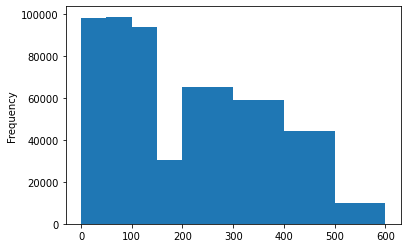

In [7]:
dataset.clinical_event_time.plot.hist(bins=[0,50,100,150,200,300,400,500,600])

<AxesSubplot:ylabel='Frequency'>

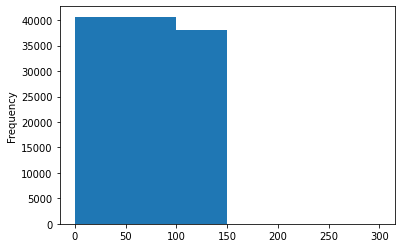

In [8]:
tmp = dataset.groupby("clinical_event_member_id").clinical_event_id.value_counts().groupby(level=0).value_counts()
tmp = pd.DataFrame(tmp[tmp.values==1])
#tmp.columns = tmp.columns.get_level_values(0)
tmp = pd.DataFrame(tmp.unstack(-1).index)
tmp = dataset.merge(tmp)
tmp.clinical_event_time.plot.hist(bins=[0,50,100,150,300])

<AxesSubplot:ylabel='Frequency'>

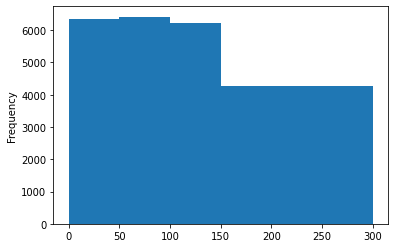

In [9]:
tmp = dataset.groupby("clinical_event_member_id").clinical_event_id.value_counts().groupby(level=0).value_counts()
tmp = pd.DataFrame(tmp[tmp.values==2])
#tmp.columns = tmp.columns.get_level_values(0)
tmp = pd.DataFrame(tmp.unstack(-1).index)
tmp = dataset.merge(tmp)
tmp.clinical_event_time.plot.hist(bins=[0,50,100,150,300])

In [10]:
dataset = dataset.sort_values(["clinical_event_member_id","clinical_event_time"])
dataset.clinical_event_time = pd.to_numeric(dataset.clinical_event_time)

In [11]:
dataset["consecutive_events"]=dataset.groupby("clinical_event_member_id").clinical_event_time.diff(1)

<AxesSubplot:ylabel='Frequency'>

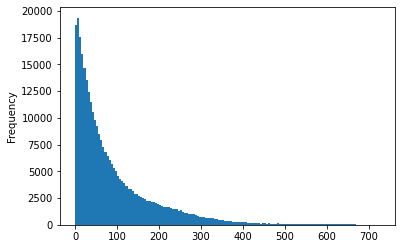

In [12]:
dataset.consecutive_events.plot.hist(bins=list(range(0,730,5)))

<AxesSubplot:ylabel='Frequency'>

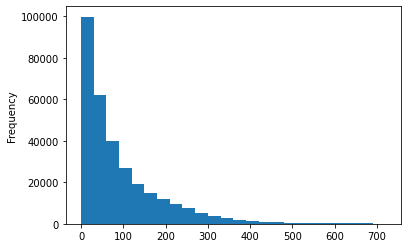

In [13]:
dataset.consecutive_events.plot.hist(bins=list(range(0,730,30)))